# PCA--Mathematical Calculate

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
np.random.seed(23)

mu_vec1= np.array([0,0,0])
cov_mat1= np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_sample= np.random.multivariate_normal(mu_vec1, cov_mat1, 20)

In [3]:
df= pd.DataFrame(class1_sample, columns= ['feature1', 'feature2', 'feature3'])
df['target']= 1

In [4]:
mu_vec2= np.array([1,1,1])
cov_mat2= np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_sample= np.random.multivariate_normal(mu_vec2, cov_mat2, 20)

In [5]:
df2= pd.DataFrame(class2_sample, columns= ['feature1', 'feature2', 'feature3'])
df2['target']= 0

In [6]:
# df= df.concat(df2, ignore_index= True)
# df= df.sample(40)
df = pd.concat([df, df2], ignore_index=True)
df = df.sample(n=40, random_state=42)
df = df.sample(frac=1)

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
df.head()

,feature1,feature2,feature3,target
15,-0.045438,1.040886,-0.094035,1
18,-0.331617,-1.632386,0.619114,1
34,0.177061,-0.598109,1.226512,0
9,1.267248,0.173634,-1.223255,1
13,-0.022539,0.013422,0.935945,1


In [9]:
import plotly.express as px
#y_train_trf= y_train.astype(str)

fig= px.scatter_3d(df, x=df['feature1'], y= df['feature2'], z= df['feature3'],
                  color= df['target'].astype('str'))
fig.update_traces(marker= dict(size= 12, line= dict(width= 2, color= 'DarkSlateGrey')),
                 selector= dict(mode= 'markers'))


fig.show()

In [10]:
#step 1 - apply standard scaling
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

df.iloc[:,0:3]= scaler.fit_transform(df.iloc[:,0:3])

In [11]:
#step 2= Find Covariance Matrix
covariance_matrix= np.cov([df.iloc[:,0],df.iloc[:, 1], df.iloc[:, 2]])

print('Covariance Matrix: \n', covariance_matrix)

Covariance Matrix: 
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [12]:
eigen_values, eigen_vector= np.linalg.eig(covariance_matrix)

In [13]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [14]:
eigen_vector

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

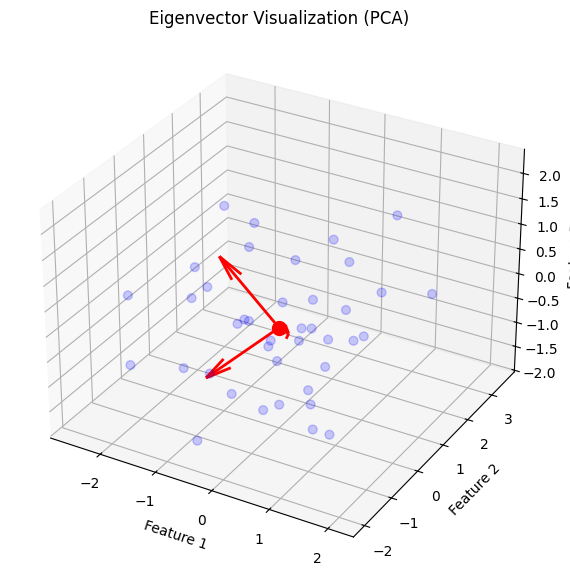

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# ===== Mean calculation =====
mean_x = df['feature1'].mean()
mean_y = df['feature2'].mean()
mean_z = df['feature3'].mean()

# ===== 3D Figure =====
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# ===== Data points =====
ax.scatter(
    df['feature1'],
    df['feature2'],
    df['feature3'],
    color='blue',
    alpha=0.2,
    s=40
)

# ===== Mean point =====
ax.scatter(
    mean_x, mean_y, mean_z,
    color='red',
    s=100
)

# ===== Eigenvectors =====
for v in eigen_vector.T:   # shape (3, n)
    ax.quiver(
        mean_x, mean_y, mean_z,
        v[0], v[1], v[2],
        length=1.5,
        normalize=True,
        color='red',
        linewidth=2
    )

# ===== Labels =====
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
ax.set_title('Eigenvector Visualization (PCA)')

plt.show()


In [16]:
pc = eigen_vector[:, 0:2]   # first 2 principal components
pc

array([[-0.53875915, -0.69363291],
       [-0.65608325, -0.01057596],
       [-0.52848211,  0.72025103]])

In [17]:
# transformed_df = np.dot(df.iloc[:,0:3],pc.T)
# # 40,3 - 3,2
# new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
# new_df['target'] = df['target'].values
# new_df.head()

X = df.iloc[:, 0:3].values
X_centered = X - X.mean(axis=0)

transformed_df = np.dot(X_centered, pc)

new_df = pd.DataFrame(transformed_df, columns=['PC1', 'PC2'])
new_df['target'] = df['target'].reset_index(drop=True)

new_df.head()

,PC1,PC2,target
0,0.216358,-0.197431,1
1,1.694055,0.454694,1
2,0.524464,0.520221,0
3,0.665521,-1.699993,1
4,0.370530,0.451170,1
